Shapes of data before resizing
x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)
x_train and x_test Shapes AFTER resizing
x_train.shape (60000, 32, 32)
x_test.shape (10000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 256)         295168    
_______________________________________

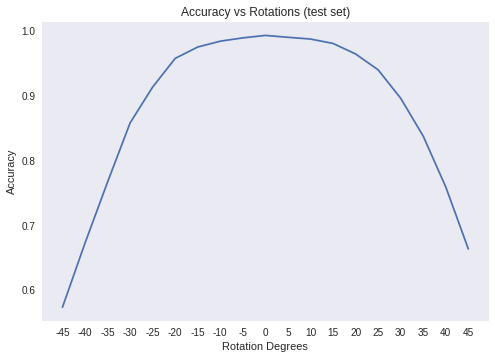

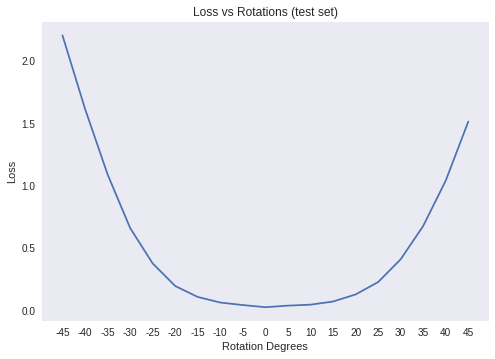

In [0]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist 
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFilter




(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train_temp = []
x_test_temp = []
x_test_temp_rotate = []
# Reshape 
for i in range(len(x_train)):
	X_trainImage = Image.fromarray(x_train[i])
	new_image = X_trainImage.resize((32,32), Image.HAMMING)
	img_array = new_image.convert('L')
	img_array = np.array(img_array)
	x_train_temp.append(img_array)


x_train = np.array(x_train_temp)



img_rows, img_cols = 32, 32


if K.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_train /= 255 #normalize to avoid overfit

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 

model.add(Flatten()) 


model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))


model.add(Dense(10, activation='softmax'))

print(model.summary())

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting the model
model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

scores = []
degrees = [-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

for each_rot in degrees:
	x_test_temp_rotate = []
	print("Testing model with rotation", rot)
	# Reshape 
	for i in range(len(x_test)):
		X_trainImage = Image.fromarray(x_test[i])
		new_image = X_trainImage.resize((32,32), Image.HAMMING)
		
		# Rotate
		rotate_image = new_image.rotate(each_rot) 
		
		img_array_rot = rotate_image.convert('L')
		x_test_temp_rotate.append(np.array(img_array_rot))
		
	x_test_rotated = np.array(x_test_temp_rotate)

	
	if K.image_data_format() == 'channels_first':
		x_test_rotated = x_test_rotated.reshape(x_test_rotated.shape[0], 1, img_rows, img_cols)
	else:
		x_test_rotated = x_test_rotated.reshape(x_test_rotated.shape[0], img_rows, img_cols, 1)
		
	 
	x_test_rotated = x_test_rotated.astype('float32')
	x_test_rotated /= 255 #normalize to avoid overfit

	score = model.evaluate(x_test_rotated, y_test, batch_size=32)
	scores.append(score)

scores = np.array(scores)
print(scores)

rot_lab = ['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0', '5', '10', '15', '20', '25', '30', '35', '40', '45']


plt.plot(degrees, scores[:,1])
plt.xticks(degrees, rot_lab)
plt.title('Accuracy vs Rotations (test set)')
plt.ylabel('Accuracy')
plt.xlabel('Rotation Degrees')
plt.grid()
plt.show()

plt.plot(degrees, scores[:,0])
plt.xticks(degrees, rot_lab)
plt.title('Loss vs Rotations (test set)')
plt.ylabel('Loss')
plt.xlabel('Rotation Degrees')
plt.grid()
plt.show()














